## Heart dataset

In [1]:
import pandas as pd
from Helpers import helpers
import seaborn as sns
import matplotlib.pyplot as plt
heart_df = helpers.load_dataset('../data/heart-dataset/heart_numerical.csv')
heart_df_with_class = heart_df.copy()

/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [2]:
heart_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,class
0,120.0,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,1.0
1,132.0,4.0,0.0,4.0,2.0,130.0,68.0,198.0,6.0,0.0
2,133.0,2.0,0.0,5.0,2.0,130.0,68.0,198.0,5.0,0.0
3,134.0,2.0,0.0,6.0,2.0,117.0,53.0,170.0,11.0,0.0
4,132.0,4.0,0.0,5.0,0.0,117.0,53.0,170.0,9.0,0.0


In [3]:
heart_dataset_columns = ['baseline value', 'histogram_min']
heart_df_2d = heart_df[heart_dataset_columns]
heart_df_2d.describe()

,baseline value,histogram_min
count,2126.000000,2126.000000
mean,133.303857,93.579492
std,9.840844,29.560212
min,106.000000,50.000000
25%,126.000000,67.000000
50%,133.000000,93.000000
75%,140.000000,120.000000
max,160.000000,159.000000


<Axes: xlabel='histogram_min', ylabel='Count'>

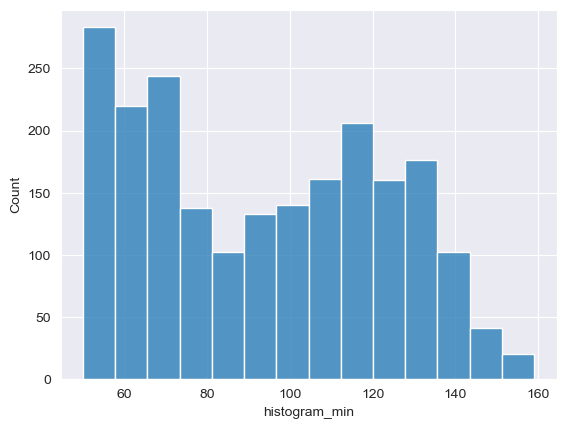

In [4]:
sns.histplot(data=heart_df_2d, x='histogram_min')


<Axes: xlabel='baseline value', ylabel='Count'>

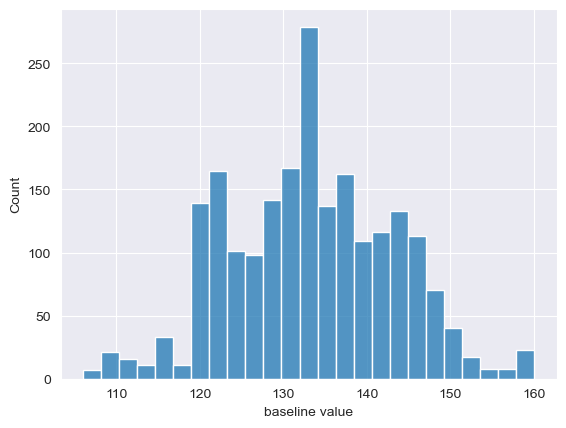

In [5]:
sns.histplot(data=heart_df_2d, x='baseline value')

In [6]:
def compare_perturbed_and_original(plain_df: pd.DataFrame, dataset_name: str, column_name, column_name2):
    heart_df_2d_kd_laplace = helpers.load_dataset('../ExperimentRunners/data/2d-laplace-optimal-truncated/'+dataset_name+'/perturbed_0.5.csv')

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(data=plain_df, x=column_name, y=column_name2, ax=axs[0], alpha=0.5)
    sns.scatterplot(data=heart_df_2d_kd_laplace, x=column_name, y=column_name2, ax=axs[1], alpha=0.5)
    axs[0].set_title('kd-Laplace/grid/optimal')
    axs[1].set_title('Original')
    plt.show()

In [7]:
heart_df_2d_kd_laplace = helpers.load_dataset('../ExperimentRunners/data/2d-laplace-optimal-truncated/heart-dataset/perturbed_0.5.csv')
heart_df_2d_kd_laplace.head()

,baseline value,histogram_min
0,120.779315,59.009136
1,129.677698,67.079546
2,135.753245,69.023752
3,132.867542,55.066215
4,132.690554,53.469255


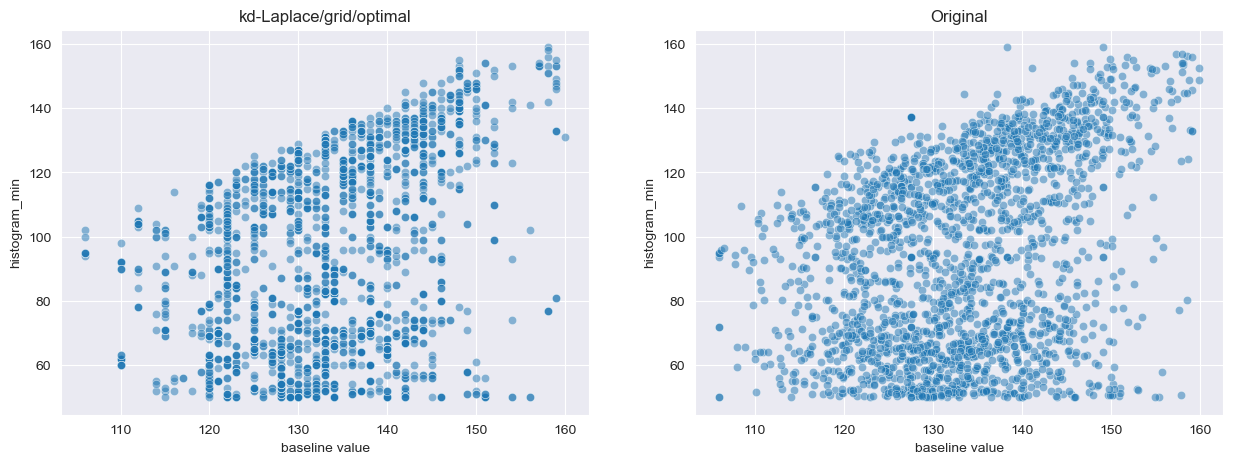

In [8]:
compare_perturbed_and_original(heart_df_2d, 'heart-dataset', 'baseline value', 'histogram_min')

In [9]:
seeds_df = helpers.load_dataset('../data/seeds-dataset/rq1.csv')
seeds_df_2_columns = ['area', 'perimeter']
seeds_df_2 = seeds_df[seeds_df_2_columns]
seeds_df_2.describe()

,area,perimeter
count,210.000000,210.000000
mean,14.847524,14.559286
std,2.909699,1.305959
min,10.590000,12.410000
25%,12.270000,13.450000
50%,14.355000,14.320000
75%,17.305000,15.715000
max,21.180000,17.250000


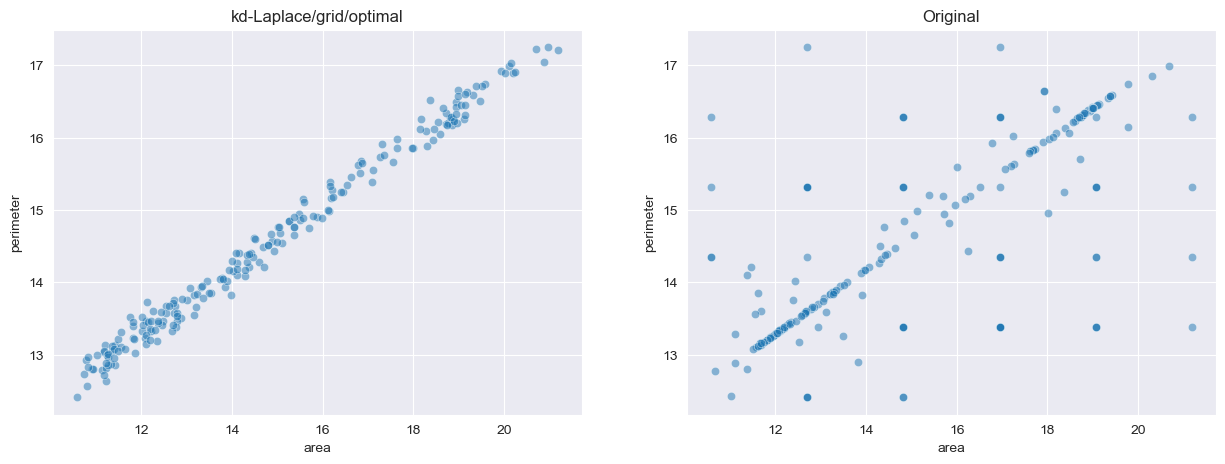

In [10]:
compare_perturbed_and_original(seeds_df_2, 'seeds-dataset', 'area', 'perimeter')


Because the perturbation spreads out the data evenly, it messes up the shape of the data.
If the original datashape is already spread out, the perturbation does not change the shape of the data.
The seeds-dataset is a line shape, so we see that the perturbation reshapes the data entirely. It is therefore also expected the utility suffers for this type of data.

We evaluate if the distribution of the data is preserved by looking at the histogram of the data.

<Axes: xlabel='area', ylabel='Count'>

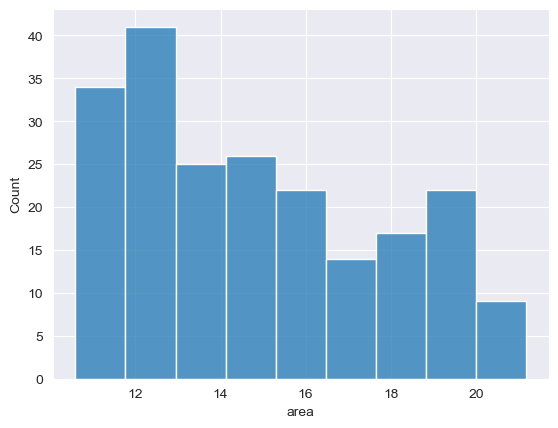

In [11]:
sns.histplot(data=seeds_df_2, x='area')


<Axes: xlabel='perimeter', ylabel='Count'>

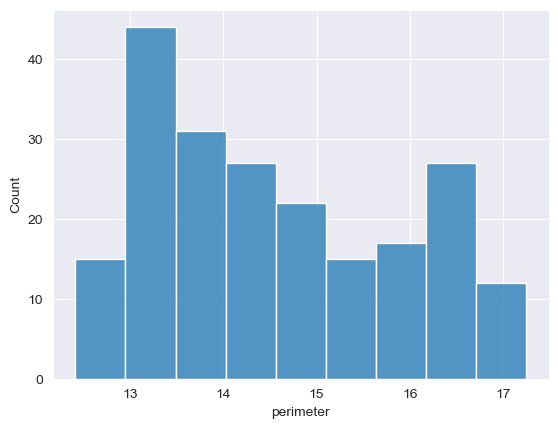

In [12]:
sns.histplot(data=seeds_df_2, x='perimeter')


In [13]:
seeds_df_2_perturbed = helpers.load_dataset('../ExperimentRunners/data/2d-laplace-optimal-truncated/seeds-dataset/perturbed_0.5.csv')
seeds_df_2_perturbed.head()

,area,perimeter
0,14.826000,15.314000
1,21.180000,13.378000
2,15.836859,14.824400
3,12.195396,13.371492
4,12.107834,13.331975


<Axes: xlabel='perimeter', ylabel='Count'>

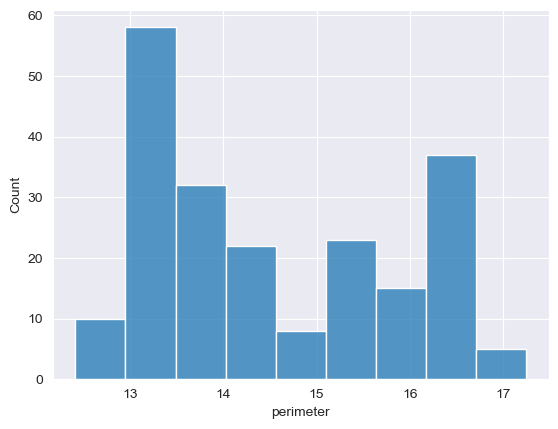

In [14]:
sns.histplot(data=seeds_df_2_perturbed, x='perimeter')


<Axes: xlabel='area', ylabel='Count'>

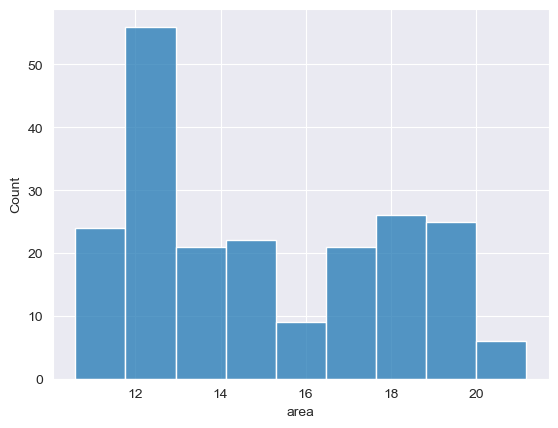

In [15]:
sns.histplot(data=seeds_df_2_perturbed, x='area')


Because both datasets are very different in number of datapoints, we are not b-eable to compare them without ruling out the impact of size.
Therefore, we will select the same amount of data-points from the heart-dataset as the seeds-dataset.
This way we're be-able to show the impact of the perturbation on the shape of the data.


In [16]:
# select 210 datapoints from the heart-dataset
heart_df_2d_sample = heart_df_2d.sample(n=210, random_state=23)
# compare the sample data with the original data by checking the std / mean
print(heart_df_2d_sample.describe())
print(heart_df_2d.describe())

       baseline value  histogram_min
count      210.000000     210.000000
mean       132.347619      95.138095
std          9.513934      29.502331
min        106.000000      50.000000
25%        125.000000      67.000000
50%        132.000000     101.000000
75%        139.750000     120.000000
max        159.000000     149.000000
       baseline value  histogram_min
count     2126.000000    2126.000000
mean       133.303857      93.579492
std          9.840844      29.560212
min        106.000000      50.000000
25%        126.000000      67.000000
50%        133.000000      93.000000
75%        140.000000     120.000000
max        160.000000     159.000000


In [17]:
print(heart_df_2d_sample.shape, seeds_df_2.shape)

(210, 2) (210, 2)


Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
     baseline value  histogram_min  is_remapped
0        129.670272      55.148620        False
1        118.893569     103.925023        False
2        125.121067      99.111659        False
3        134.657914      62.102206        False
4        110.799464      52.092918        False
..              ...            ...          ...
205      116.600000     109.400000        False
206      134.776345     133.595926        False
207      140.626696     132.140312        False
208      137.594009      66.594904        False
209      141.207037     121.441691        False

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (11, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


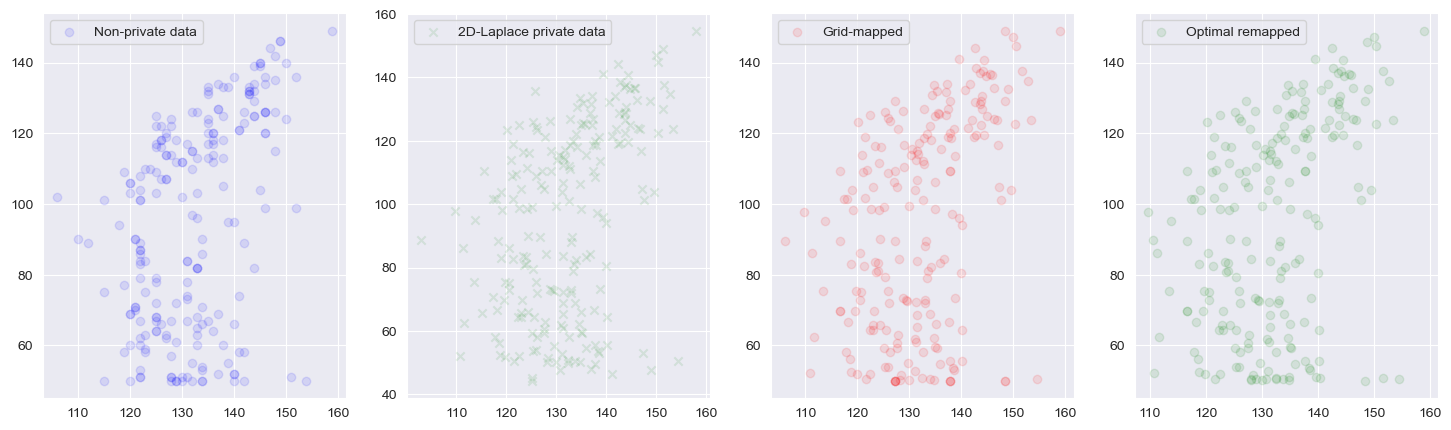

In [18]:
from Helpers import ldp_mechanism
ldp = ldp_mechanism.ldp_mechanism()
heart_df_2d_sample_perturbed = ldp.randomise(heart_df_2d_sample, 0.5, plot_validation=True)

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
          area  perimeter  is_remapped
0    14.826000  12.410000         True
1    13.336145  14.651821        False
2    12.708000  17.250000         True
3    10.590000  16.282000        False
4    14.199725  13.592004        False
..         ...        ...          ...
205  16.944000  12.410000         True
206  10.590000  12.410000         True
207  10.590000  12.410000         True
208  10.590000  13.378000         True
209  10.590000  12.410000         True

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (132, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


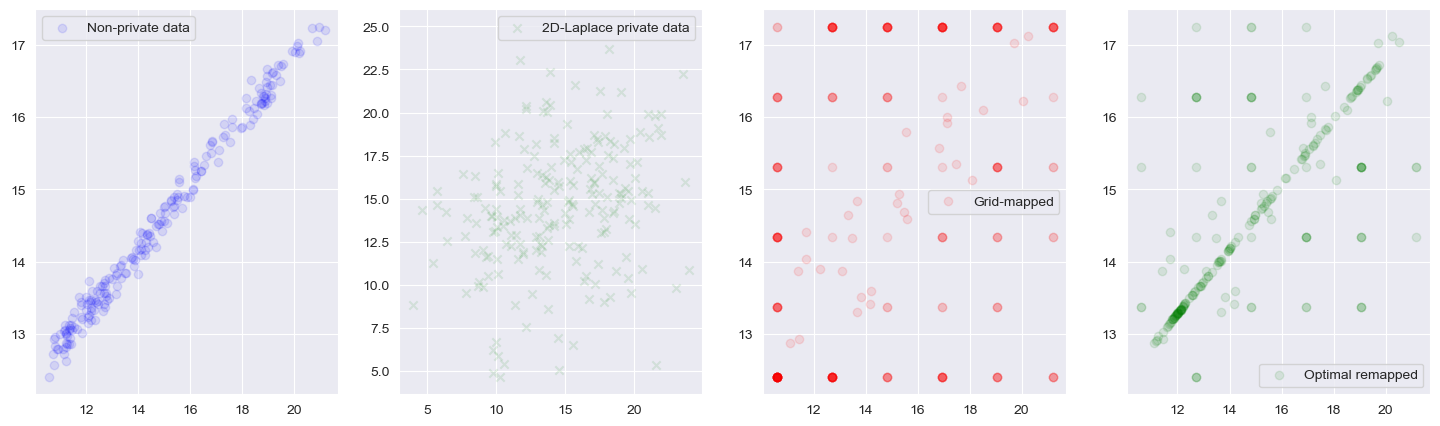

In [19]:
seeds_df_2_perturbed = ldp.randomise(seeds_df_2, 0.5, plot_validation=True)

In [20]:
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, calinski_harabasz_score, silhouette_score
from sklearn import clone
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from Helpers import helpers
k_means_model = KMeans(n_clusters=4, init='random', n_init='auto')
def measure_external_validity_report(cluster_model, columns, plain_df, perturbed_df):
    plain_df = plain_df[columns]
    perturbed_df = perturbed_df[columns]
    plain_df_scaled = StandardScaler().fit_transform(plain_df)
    perturbed_df_scaled = StandardScaler().fit_transform(perturbed_df)
    plain_fitted_df = cluster_model.fit(plain_df_scaled)
    perturbed_fitted_df = clone(cluster_model).fit(perturbed_df_scaled)
    ami = adjusted_mutual_info_score(plain_fitted_df.labels_, perturbed_fitted_df.labels_)
    ari = adjusted_rand_score(plain_fitted_df.labels_, perturbed_fitted_df.labels_)
    ch = 0.0
    sc = 0
    try:
        ch = calinski_harabasz_score(perturbed_df_scaled, perturbed_fitted_df.labels_)
    except:
        print('Calinski Harabasz score failed, defaulting to 0.0 as score')
    try:
        sc = silhouette_score(perturbed_df_scaled, perturbed_fitted_df.labels_)
    except:
        print('Silhouette score failed, defaulting to 0 as score')
    return ami, ari, ch, sc
def generate_utility_report(epsilon, columns, plain_df):
    dataframe = {'type': [], 'epsilon': [], 'ari': [], 'ami': [], 'ch': [], 'sc': []}
    perturbed_df = ldp.randomise(plain_df, epsilon, plot_validation=True)
    n_times = 10
    algorithmName = helpers.map_models_to_name(k_means_model)
    dataframe['type'].append(algorithmName)
    dataframe['epsilon'].append(epsilon)
    ami_list = []
    ari_list = []
    ch_list = []
    sc_list = []
    for i in range(n_times):
        ami, ari, ch, sc = measure_external_validity_report(k_means_model, columns, plain_df, perturbed_df)
        ami_list.append(ami)
        ari_list.append(ari)
        ch_list.append(ch)
        sc_list.append(sc)
    ami = np.sum(ami_list) / n_times
    ari = np.sum(ari_list) / n_times
    dataframe['ami'].append(ami)
    dataframe['ari'].append(ari)
    dataframe['ch'].append(np.sum(ch_list) / n_times)
    dataframe['sc'].append(np.sum(sc_list) / n_times)
    return pd.DataFrame(dataframe)

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
     baseline value  histogram_min  is_remapped
0        127.200000      50.000000         True
1        118.734005     105.983636        False
2        134.289018     103.130791        False
3        136.457830      65.203600        False
4        114.619701      50.374090        False
..              ...            ...          ...
205      118.861124     108.508713        False
206      138.470012     133.990911        False
207      143.271971     131.853066        False
208      134.940713      68.312378        False
209      143.651002     120.789095        False

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (9, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


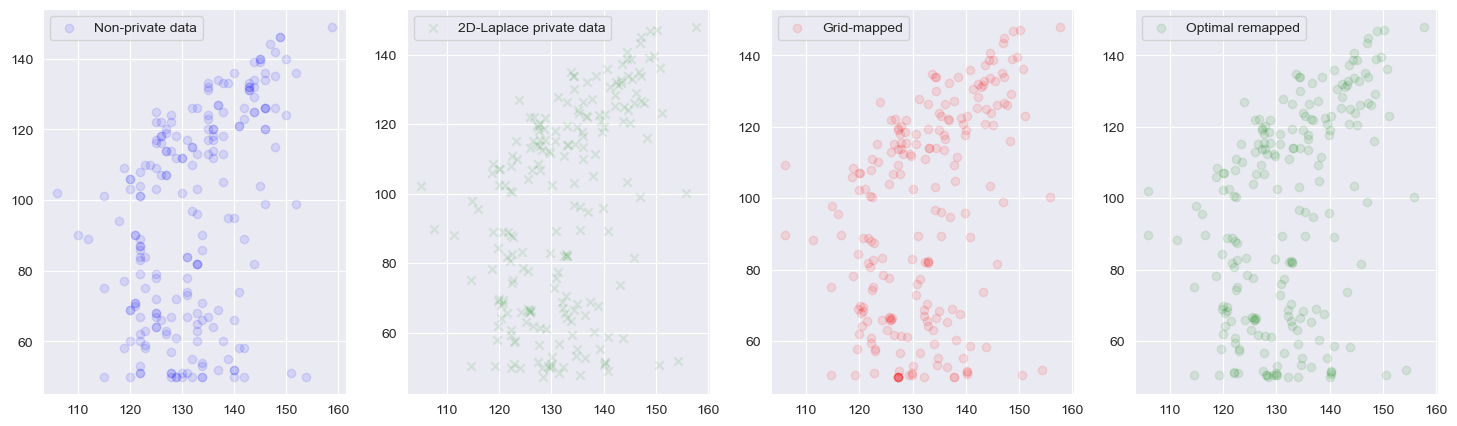

,type,epsilon,ari,ami,ch,sc
0,"KMeans(clusters=4, init=random)",1.5,0.886605,0.858231,253.612764,0.438347


In [21]:
utility_heart_sample_2d = generate_utility_report(1.5, heart_dataset_columns, heart_df_2d_sample)
utility_heart_sample_2d

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
          area  perimeter  is_remapped
0    16.944000  16.282000        False
1    14.826000  15.314000        False
2    13.970812  13.946450        False
3    12.708000  15.314000        False
4    16.944000  13.378000        False
..         ...        ...          ...
205  10.590000  12.410000         True
206  12.708000  12.410000         True
207  13.445140  14.062957        False
208  11.236807  13.491570        False
209  12.708000  12.410000        False

[210 rows x 3 columns]
All data that was remapped using a grid, is optimally remapped...
Points outside domain.... (47, 3)
Shapes (210, 3) (210, 3) (210, 3) (210, 4)


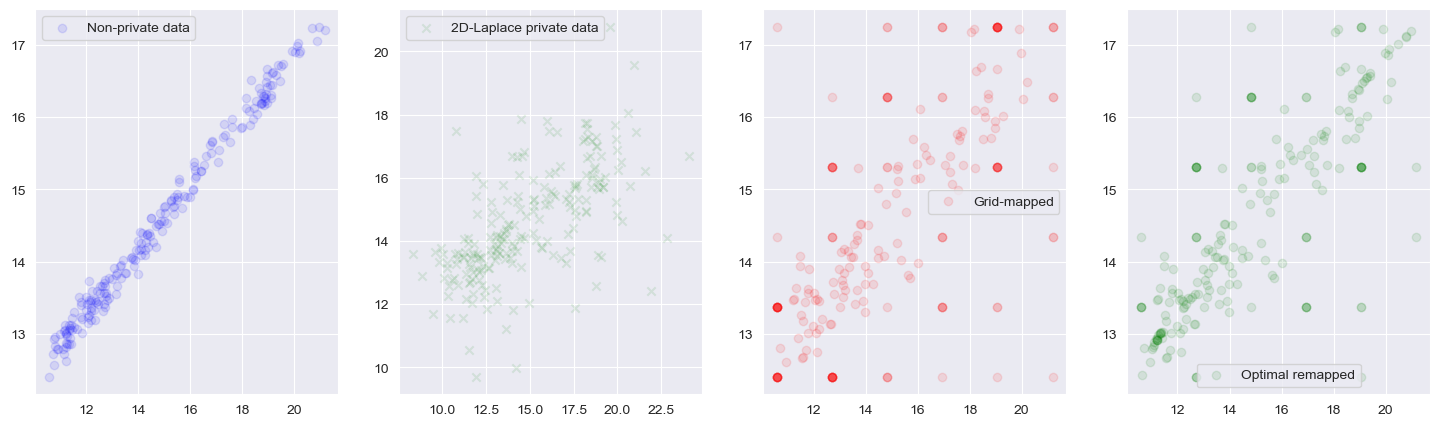

,type,epsilon,ari,ami,ch,sc
0,"KMeans(clusters=4, init=random)",1.5,0.52805,0.514944,374.765065,0.446557


In [22]:
utility_seeds_2d = generate_utility_report(1.5, seeds_df_2_columns, seeds_df_2)
utility_seeds_2d

We see a clear difference between the two dataset related to the external validity.
In addition, we now analyze the security implications.
The expectation is that the seeds dataset is more secure than the heart dataset, due to it has more spread and therefore more distance.

In [23]:
heart_df_2d_sample_y = heart_df_with_class.iloc[heart_df_2d_sample.index]
heart_df_2d_sample_y = heart_df_2d_sample_y['class']
heart_df_2d_sample_y

568     0.0
460     0.0
1521    0.0
953     0.0
38      0.0
       ... 
1270    0.0
1964    0.0
1808    0.0
767     2.0
805     0.0
Name: class, Length: 210, dtype: float64

In [24]:
heart_df_2d_sample_y.isnull().values.any()
heart_df_2d_sample.head()

,baseline value,histogram_min
568,128.0,50.0
460,120.0,106.0
1521,133.0,103.0
953,136.0,64.0
38,115.0,50.0


In [25]:
heart_y_count = len(heart_df_2d_sample_y.unique())
print(heart_y_count, heart_df_2d_sample.columns.values,heart_df_2d_sample_y)

3 ['baseline value' 'histogram_min'] 568     0.0
460     0.0
1521    0.0
953     0.0
38      0.0
       ... 
1270    0.0
1964    0.0
1808    0.0
767     2.0
805     0.0
Name: class, Length: 210, dtype: float64


In [26]:
print(heart_df_2d_sample.shape, heart_df_2d_sample_y.shape)

(210, 2) (210,)


In [27]:
security_heart_df = helpers.run_mi_experiments(heart_df_2d_sample.values, heart_df_2d_sample_y, [1.5], algorithm=ldp.randomise, n_times=10, targets=heart_y_count, columns=heart_df_2d_sample.columns.values)

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
    baseline value  histogram_min  is_remapped
0       135.227272     120.632851        False
1       141.984416     123.183925        False
2       144.108276     140.632572        False
3       145.208115     132.936125        False
4       149.000000     146.000000         True
5       119.000000      50.000000         True
6       141.837435      88.747663        False
7       131.000000     126.800000        False
8       143.694768     140.331429        False
9       142.586840     131.002180        False
10      135.723730     117.251275        False
11      139.128929     124.451667        False
12      125.000000      69.200000        False
13      119.000000     107.600000         True
14      126.767056     106.269650        False
15      125.281972      59.713560        Fal

In [28]:
security_heart_df.groupby(['epsilon']).mean()

,shokri_mi_adv,attack_adv,tpr,fpr,run
epsilon,,,,,
1.5,0.334615,0.644339,"[0.0, 0.773076923076923, 1.0]","[0.0, 0.4384615384615384, 1.0]",4.5


In [29]:
seeds_df_2d_sample_y = seeds_df.iloc[seeds_df.index]
seeds_df_2d_sample_y = seeds_df_2d_sample_y['class']
seeds_df_2d_sample_y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: class, Length: 210, dtype: int64

In [30]:
seeds_y_count = len(seeds_df_2d_sample_y.unique())
seeds_y_count

3

In [31]:
security_seeds_df = helpers.run_mi_experiments(seeds_df_2.values, seeds_df_2d_sample_y, [1.5], algorithm=ldp.randomise, n_times=10, targets=seeds_y_count, columns=seeds_df_2.columns.values)


Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
         area  perimeter  is_remapped
0   13.776761  14.626404        False
1   15.177804  14.649714        False
2   13.385872  13.393495        False
3   12.364000  12.410000         True
4   10.590000  13.228000        False
5   10.590000  14.046000         True
6   14.061280  13.595650        False
7   13.595613  13.422710        False
8   15.912000  14.046000        False
9   19.460000  14.864000        False
10  15.912000  16.500000        False
11  19.460000  15.682000         True
12  17.686000  12.410000         True
13  14.138000  14.864000        False
14  14.138000  12.410000         True
15  17.686000  14.864000        False
16  17.686000  15.682000        False
17  10.590000  14.046000         True
18  12.364000  14.046000        False
19  19.460000  16.500000         Tru

In [32]:
security_seeds_df.groupby(['epsilon']).mean()

,shokri_mi_adv,attack_adv,tpr,fpr,run
epsilon,,,,,
1.5,0.161538,0.592184,"[0.0, 0.6192307692307693, 1.0]","[0.0, 0.4576923076923077, 1.0]",4.5


Also security-wise there is a big difference. The seeds dataset is more secure than the heart dataset. This is due to the fact that the seeds dataset has more spread and therefore more distance between the datapoints. It was expected, as the AMI / ARI also was not really good for the seeds-dataset.

## Setup research
We generate different equal sized datasets with different shapes and use this to prove our point.
- 1000 datapoints with 2 dimensions with a line shape data.
- 1000 datasets with 2 dimensions with a circle shape data.
- 1000 datasets with 2 dimensions with a data skewed to the left.

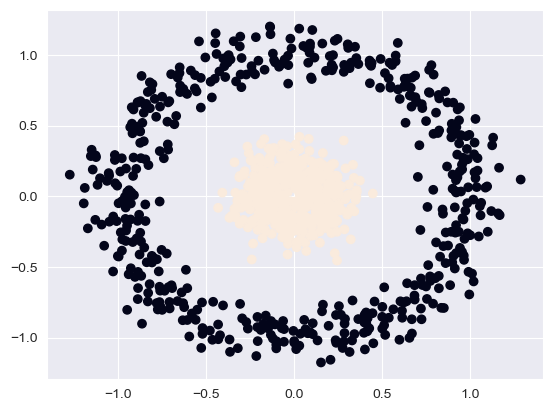

In [4]:
from sklearn.datasets import make_classification, make_circles
import pandas as pd
import matplotlib.pyplot as plt
circle_X, circle_y = make_circles(n_samples=(1000), random_state=3, noise=0.1, factor=0.2)
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y)


In [5]:
from sklearn.datasets import make_regression

line_X, line_y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[1.0],
    random_state=42
)

df = pd.concat([pd.DataFrame(line_X), pd.Series(line_y)], axis=1)
df.columns = ['x1', 'x2', 'y']
# 5 random rows
df.sample(5)

,x1,x2,y
836,1.644855,-0.591426,0
82,2.632577,0.116308,0
526,1.596440,-0.229574,0
375,2.486712,0.027905,0
149,1.367837,-0.914356,0


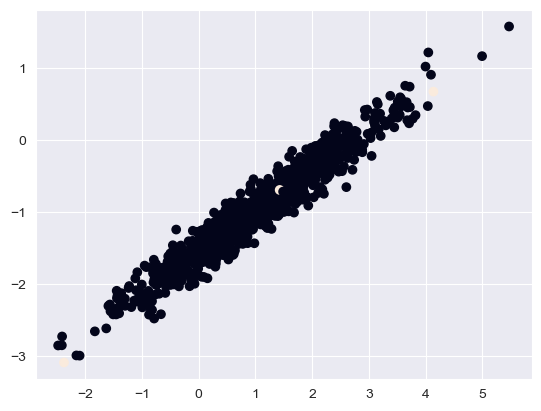

In [6]:
plt.scatter(line_X[:, 0], line_X[:, 1], c=line_y)

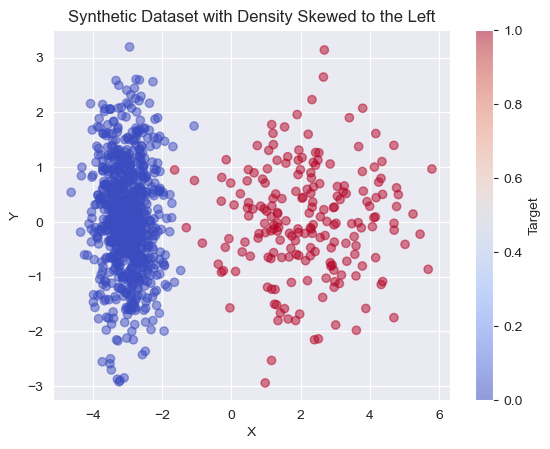

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate the synthetic dataset
num_samples = 1000

# Generate X values with a higher density on the left side
x_left = np.random.normal(loc=-3, scale=0.5, size=int(num_samples * 0.8))
x_right = np.random.normal(loc=2, scale=1.5, size=int(num_samples * 0.2))
x = np.concatenate((x_left, x_right))

# Generate Y values with a normal distribution
y = np.random.normal(loc=0, scale=1, size=num_samples)

# Assign target variable based on X values
targets = np.where(np.isin(x, x_left), 0, 1)

# Combine X, Y, and targets into a DataFrame
data = pd.DataFrame({'X': x, 'Y': y, 'Target': targets})

# Plot the scatter plot
plt.scatter(data['X'], data['Y'], c=data['Target'], cmap='coolwarm', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Dataset with Density Skewed to the Left')
plt.colorbar(label='Target')
plt.show()


In [8]:
def generate_left_skewed_dataset(datapoints = 1000):
    # Generate X values with a higher density on the left side
    x_left = np.random.normal(loc=-3, scale=0.5, size=int(datapoints * 0.9))
    x_right = np.random.normal(loc=2, scale=1.5, size=int(datapoints * 0.1))
    x = np.concatenate((x_left, x_right))

    # Generate Y values with a normal distribution
    y = np.random.normal(loc=0, scale=1, size=datapoints)

    # Assign target variable based on X values
    targets = np.where(np.isin(x, x_left), 0, 1)

    # Combine X, Y, and targets into a DataFrame
    data = pd.DataFrame({'x1': x, 'x2': y, 'y': targets})
    return data

In [92]:
from sklearn.datasets import make_classification, make_circles
def generate_test_datasets(datapoints = 1000, plot=False):
    circle_X, circle_y = make_circles(n_samples=(datapoints), random_state=3, noise=0.1, factor=0.2)

    df_circle_X = pd.concat([pd.DataFrame(circle_X), pd.Series(circle_y)], axis=1)
    df_circle_X.columns = ['x1', 'x2', 'class']
     # Line dataset in 2D
    line_X0 = np.linspace(-1, 1, datapoints) + np.random.normal(0, 0.05, datapoints)  # Add some noise
    line_X1 = np.linspace(-1, 1, datapoints) + np.random.normal(0, 0.05, datapoints)  # Add some noise
    line_y = (line_X0 > 0).astype(int)
    
    df_line_X = pd.DataFrame({'x1': line_X0, 'x2': line_X1, 'class': line_y})

    df_skewed_X = generate_left_skewed_dataset(datapoints)

    if plot:
        fig, ax = plt.subplots(1, 3, figsize=(18, 5))
        ax[0].scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y)
        ax[1].scatter(line_X[:, 0], line_X[:, 1], c=line_y)
        ax[2].scatter(df_skewed_X['x1'], df_skewed_X['x2'], c=df_skewed_X['y'])
        ax[0].set_title('Circle dataset')
        ax[1].set_title('Line dataset')
        ax[2].set_title('Skewed dataset')
        plt.suptitle('Synthetic Datasets (shape: 1000, 2) for researching impact of data-shape on utility and privacy')
        plt.show()
    return df_circle_X, df_line_X, df_skewed_X

def generate_and_export_synthetic_datasets(datapoints = 1000, save_path = 'data', show_plot = False):
    df_circle_X, df_line_X, df_skewed_X = generate_test_datasets(datapoints, plot=show_plot)
    df_circle_X.to_csv(f'{save_path}/circle_{datapoints}.csv', index=False)
    df_line_X.to_csv(f'{save_path}/line_{datapoints}.csv', index=False)
    df_skewed_X.to_csv(f'{save_path}/skewed_{datapoints}.csv', index=False)

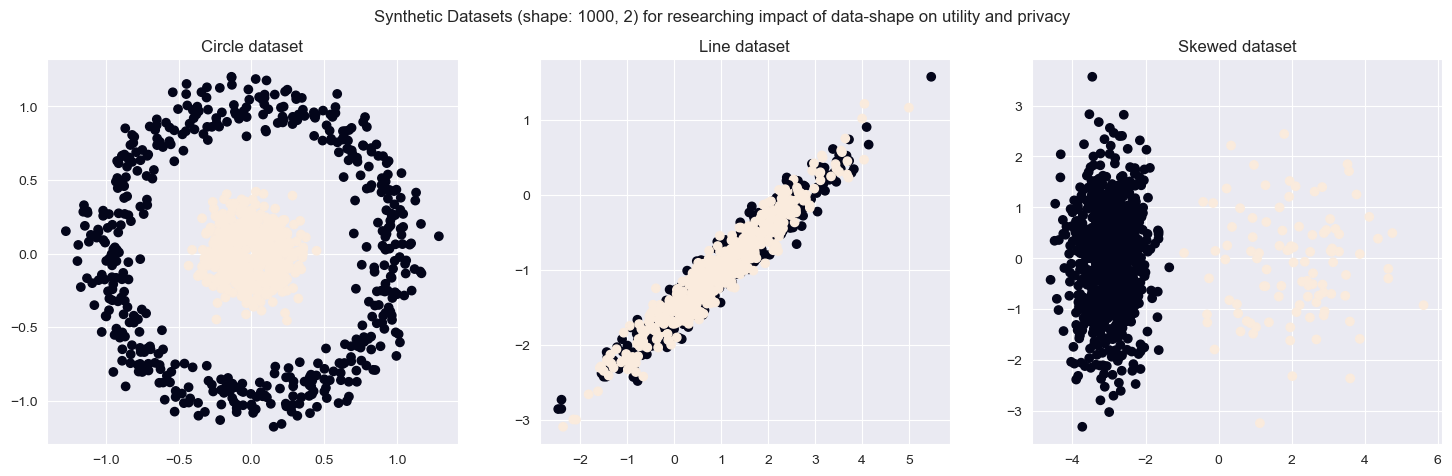

In [93]:

generate_and_export_synthetic_datasets(1000, show_plot=True)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_classification
def generate_left_skewed_dataset_3d(datapoints=1000):
    # Generate 3D left-skewed data for two clusters
    half_datapoints = datapoints // 2
    
    # First cluster
    x1_1 = np.random.exponential(scale=0.5, size=half_datapoints)
    x2_1 = np.random.exponential(scale=1, size=half_datapoints)
    x3_1 = np.random.exponential(scale=1.5, size=half_datapoints)
    
    # Second cluster (with some offset to distinguish from the first cluster)
    x1_2 = np.random.exponential(scale=0.5, size=half_datapoints) + 1
    x2_2 = np.random.exponential(scale=1, size=half_datapoints) + 1
    x3_2 = np.random.exponential(scale=1.5, size=half_datapoints) +1
    
    # Concatenate data from both clusters
    x1 = np.concatenate([x1_1, x1_2])
    x2 = np.concatenate([x2_1, x2_2])
    x3 = np.concatenate([x3_1, x3_2])
    y = np.concatenate([np.zeros(half_datapoints), np.ones(half_datapoints)])
    
    return pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'class': y})

def generate_test_datasets_3d(datapoints=1000, plot=False):
     # Generate 3D solid spherical data
    radii = np.random.uniform(0, 1, datapoints)**(1)  # Adjust the exponent to control density
    theta = np.random.uniform(0, 2 * np.pi, datapoints)
    phi = np.arccos(2 * np.random.uniform(0, 1, datapoints) - 1)
    
    circle_X0 = radii * np.sin(phi) * np.cos(theta)
    circle_X1 = radii * np.sin(phi) * np.sin(theta)
    circle_z = radii * np.cos(phi)
    
    # Assign class labels based on radii (inner half: 0, outer half: 1)
    circle_y = (radii > np.median(radii)).astype(int)
    
    df_circle_X = pd.DataFrame({'x1': circle_X0, 'x2': circle_X1, 'x3': circle_z, 'class': circle_y})

    # Generate 3D line data
    t = np.linspace(0, 1, datapoints)
    line_X0 = t
    line_X1 = t + np.random.normal(0, 0.05, datapoints)  # Add some noise
    line_z = t + np.random.normal(0, 0.05, datapoints)  # Add some noise
    
    # Assign class labels based on position along the line (first half: 0, second half: 1)
    line_y = (t > 0.5).astype(int)
    
    df_line_X = pd.DataFrame({'x1': line_X0, 'x2': line_X1, 'x3': line_z, 'class': line_y})


    # Assuming generate_left_skewed_dataset is also modified to produce 3D data
    df_skewed_X = generate_left_skewed_dataset_3d(datapoints)

    if plot:
        fig = plt.figure(figsize=(18, 5))
        
        ax1 = fig.add_subplot(131, projection='3d')
        ax1.scatter(circle_X[:, 0], circle_X[:, 1], circle_z, c=circle_y)
        ax1.set_title('Circle dataset')
        
        ax2 = fig.add_subplot(132, projection='3d')
        ax2.scatter(line_X0, line_X1, line_z, c=line_y)
        ax2.set_title('Line dataset')
        
        ax3 = fig.add_subplot(133, projection='3d')
        ax3.scatter(df_skewed_X['x1'], df_skewed_X['x2'], df_skewed_X['x3'], c=df_skewed_X['class'])
        ax3.set_title('Skewed dataset')
        
        plt.suptitle('Synthetic Datasets (shape: 1000, 3) for researching impact of data-shape on utility and privacy')
        plt.show()
    
    return df_circle_X, df_line_X, df_skewed_X

def generate_and_export_synthetic_datasets_3d(datapoints=1000, save_path='data', show_plot=False):
    df_circle_X, df_line_X, df_skewed_X = generate_test_datasets_3d(datapoints, plot=show_plot)
    df_circle_X.to_csv(f'{save_path}/circle_{datapoints}_3d.csv', index=False)
    df_line_X.to_csv(f'{save_path}/line_{datapoints}_3d.csv', index=False)
    df_skewed_X.to_csv(f'{save_path}/skewed_{datapoints}_3d.csv', index=False)


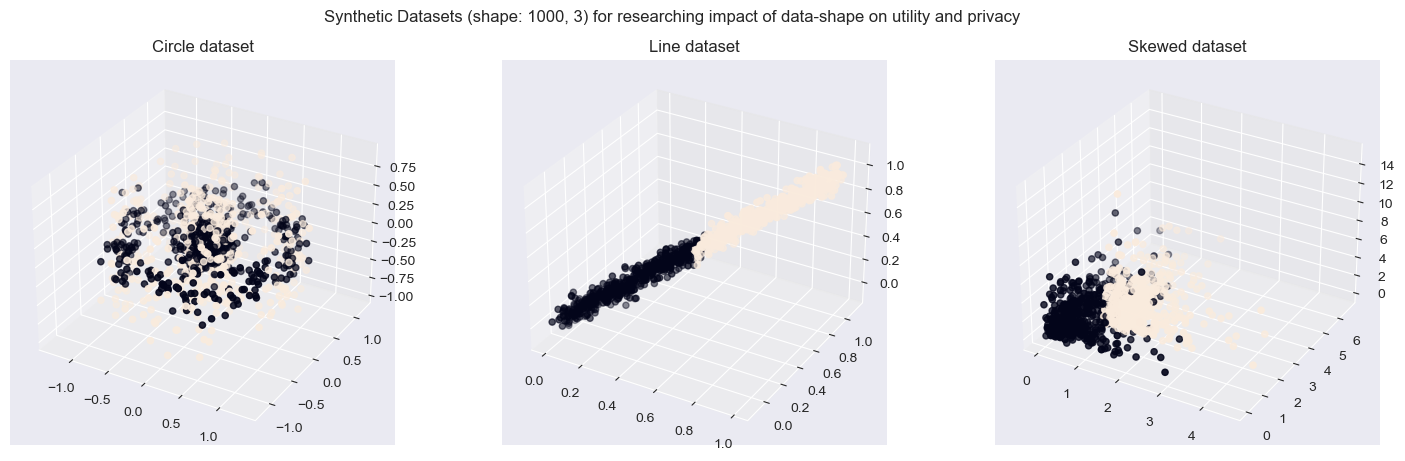

In [83]:
generate_and_export_synthetic_datasets_3d(show_plot=True)

In [12]:
import os


def generate_perturbed_synthetic_data(plain_df, data_export_path, epsilon):
    # use ldp mechanism
    ldp = ldp_mechanism.ldp_mechanism()
    # create directory if it does not exist
    if not os.path.exists(data_export_path):
        os.makedirs(data_export_path)
    export_file_loc = f'{data_export_path}/perturbed_{epsilon}.csv'
    if(os.path.exists(export_file_loc)):
        print(f'File {export_file_loc} already exists. Skip.')
        return
    # run ldp mechanism for epsilon
    perturbed_df = ldp.randomise(plain_df, epsilon)
    # save dataset
    perturbed_df.to_csv(f'{data_export_path}/perturbed_{epsilon}.csv', index=False)

def run_experiments_for_dimensionality(data_path, data_export_path, datasets, cluster_algorithm, epsilons = [1.5]):
    for dataset in datasets:
        dataset_location = f'{data_path}/{dataset}.csv'
        plain_df = helpers.load_dataset(dataset_location)
        plain_df_features = plain_df.drop(columns=['y'])
        plain_df_target = plain_df['y']
        for epsilon in epsilons:
            print(f'Run perturbation export')
            generate_perturbed_synthetic_data(plain_df, f'{data_path}/{dataset}', epsilon)

        print(f'Running utility experiments for {dataset}')
        perturbation_location = f'{data_path}/{dataset}/'
        utility_report_location = f'{data_export_path}/{dataset}_utility.csv'
        if(os.path.exists(utility_report_location)):
            print(f'File {utility_report_location} already exists. Skip.')
        else:
            utility_report = helpers.generate_external_validity_export(epsilons, cluster_algorithm, import_path=dataset_location, perturbed_path=perturbation_location, columns=plain_df_features.columns)
            utility_report.to_csv(f'{data_export_path}/{dataset}_utility.csv', index=False)

        number_of_targets = len(plain_df_target.unique())
        print(f'Running security experiments for {dataset}, with {number_of_targets} targets')
        security_report = helpers.run_mi_experiments(plain_df_features, plain_df_target, targets=number_of_targets, columns=plain_df_features.columns, epsilons=epsilons)
        security_report.to_csv(f'{data_export_path}/{dataset}_security.csv', index=False)

In [13]:
k_means_model = KMeans(n_clusters=4, n_init='auto', init='random')
run_experiments_for_dimensionality('data', 'results', ['circle_1000', 'line_1000', 'skewed_1000'], [k_means_model], epsilons=[9])

NameError: name 'KMeans' is not defined

In [ ]:
from Helpers import UtilityPlotter

circle_utility = helpers.load_dataset('results/circle_1000_utility.csv')
circle_plotter = UtilityPlotter.UtilityPlotter('data/circle_1000.csv', 'circle_1000', columns=['x1', 'x2'])
circle_plotter.plot_external_validation(circle_utility, export_path='results/circle_1000_utility.png')

## Find K-means clusters for plain dataset


In [ ]:
circle_df = helpers.load_dataset('../data/circle-dataset/circle_1000.csv')
circle_df_features = circle_df.drop(columns=['class'])
line_df = helpers.load_dataset('../data/line-dataset/line_1000.csv')
line_df_features = line_df.drop(columns=['class'])
skewed_df = helpers.load_dataset('../data/skewed-dataset/skewed_1000.csv')
skewed_df_features = skewed_df.drop(columns=['class'])


In [ ]:

from yellowbrick.cluster import KElbowVisualizer


def run_elbow_and_export_image(df, dataset_name, export_path):
    model = KMeans(init='random', n_init="auto")
    fig, ax = plt.subplots(figsize=(10, 5))
    elbow_plotter = KElbowVisualizer(model, k=(4, 12), metric='silhouette', timings=False, ax=ax, title=f'Silhouette Score Elbow for KMeans clustering on {dataset_name}')
    elbow_plotter.fit(df)
    #elbow_plotter.show(outpath=f'{export_path}/{dataset_name}_elbow.png')
    elbow_plotter.finalize()
    fig.savefig(f'{export_path}/{dataset_name}_elbow.png')
    return elbow_plotter.elbow_value_

In [ ]:
circle_score = run_elbow_and_export_image(circle_df_features, 'circle-dataset', 'results')
circle_core

In [ ]:
line_score = run_elbow_and_export_image(line_df_features, 'line-dataset', 'results')
line_score


In [ ]:
skewed_score = run_elbow_and_export_image(skewed_df_features, 'skewed-dataset', 'results')
skewed_score